## Project : Company Funding Records

The TechCrunch Continental USA file is a listing of 1,460 company funding records reported by TechCrunch. This data set contains information about amount raised in different rounds by different companies. This data set also has information about the number of employees, category of the company, location of the company etc.

## Primary Observation :
1. This data has repetetive values of columns. Like, a company can raise amounts in two different rounds and at this point the data frame ends up having a column with same company name but with different raised amounts. 
2. The data has columns which has 'Nan' values. These are cleaned. 
3. The data has multiple repeating values in each columns. These repeating values are grouped together and they are plotted with programatic approach.

## Data Informaton:

Where the Data Came From ? 

I am using the data source links provided to us during the week 2 assignment in DATA - 602 lecture. Also searching for fake datasets on google provides about spatialkey website. 
This website provides sample data sets to work up on. I used a sample data provided by TechCrunch under Company Funding Records Section.

Size of Data : 
1. Columns : 10
2. Rows : 1460
3. Size : 93,536 bytes (94 KB)

Data Source Location : 
1. Browse the URL : https://support.spatialkey.com/spatialkey-sample-csv-data/
2. Scroll down to the  'Company Funding Records' Section and then click on the 'download.csv' file link. 

## Data Inconsistences : 
1. The 'Employee Count' column has empty values for some companies.
2. The Date format in funded Date column is not generic. 

## Objectives :
1. Reading the CSV File and Loading it into pandas Data frame.
2. Getting to know the data. 
3. Finding the Nan spots in the data and filling them with the required data types.
4. Looping through the data columns and their values in order to create more reasonable visualization. 
5. Creating visualizations on different input sets. 

## Code Explanation

This code imports pandas to load csv into dataframes , matplot lib to plot the visualizations 
and datetime to convert the column into a genral date format

In [1]:
# Importing pandas and this also prints the version. 
# Prnting the version will enable the end user to get to the existing version. 
import pandas as pd
print(pd.__version__)

0.24.2


In [2]:
# Importing pyplot. This is used to plot different kinds like bras, scatter plots, pie charts etc..
import matplotlib.pyplot as plt

In [3]:
# datetime module is used to convert any string in to a date format. 
# This is used to resolve the 'Funded Column' inconsistences
import datetime as dateFormat

Panads are used to rad and load the csv files into data frame. 

In [4]:
# The CSV file is loaded into the data frame. 
# The names of the data frame are customized just to make them more clear.
# skiprows will take an index and will elimniate the row at that index. 
# Here, it is used to remove the headers. 
dataFrame = pd.read_csv("TechCrunchcontinentalUSA.csv", 
                        names = ['Permanant Link','Company','Employee Count'
                                ,'Category','City','State','Funded Date'
                                ,'Raised Amount','Raised Currency','Round'], 
                        skiprows = [0])

In [5]:
# Since Funded date column in not in proper date format. 
# It is converted into datetime using pandas and datetime.
# Funded Date colum inconsistency is solved here and this appies to every row of Funded Date colum
dataFrame['Funded Date'] = pd.to_datetime(dataFrame['Funded Date'])

On moving further, various calculations are done on 'Employee Count' and 'Raised Amount' columns and it is important is not have Nan values and these columns should be cleaned. Data Frames have fillna() method which will return True if there is a Nan Value. I used this to replace the Nan values with appropriate values.

In [6]:
# fillna() is used to replcae the Nan values 
dataFrame["Employee Count"].fillna(0, inplace = True)
dataFrame["Category"].fillna('other', inplace = True)

In [7]:
# Making sure the Employee Count is always Int. 
dataFrame['Employee Count'] = dataFrame['Employee Count'].astype('int')

##### PLotting Rounds and Raised Amount :

Now that data Cleaning, dataype conversions are done. It's time to decide which column to plot against which column. Observing the data frame, I see that there are only 9 rounds and each rounds have multiple 
raised amounts. So, plotting rounds and raised amount will give the information of total amunts raised in different rounds over time period.
In order to acheive this, looping through the 'Round' column is required. 

In [8]:
# Copying all the unique round values to a list. This is later used to compare while looping the Data Frame 
# unique()function returns all the distinct values of a column in a dataFrame. 
listofRounds = dataFrame['Round'].unique()

In [9]:
# Sorting the unique list
# Sort() is only applied on list and not on categorical data types.
listofRounds.sort()

In [10]:
# printing the list with all the unique and sorted Rounds which are mentioned in the data Frame 
print(listofRounds)

['a' 'angel' 'b' 'c' 'd' 'debt_round' 'e' 'seed' 'unattributed']


Now that I know the rounds, I looped around the dataFrame and matched the row value against the 
values in the list and appended all the respective Raised Amount to a list. This is the reaso why I declare 
multiple empty lists. 

In [11]:
# Declaration of empty list 
# Aamount list holds all the Rised Amounts of round a and like wise. 
# TotalamountList is again the list which will hold the sumation of the individua lists. 
# Typically TotalamountList contains the total amount raised by rounds in a list format. 
Aamount = []
Bamount = []
Camount = []
Damount = []
Eamount = []
seedAmount = []
angelAmount = []
debtAmount = []
unattributedAmount = []
TotalamountsList = []

This for loop is used loop through dataFrame. iterrows() method is used to loop through the data frame and 
looping through a dataFrame is like loopng through a 2D array. 
Iloc is used to access the values of the column and row 
append() is used to dump all the raised amount values into respective List according to the IF conditions 

In [12]:
# Looping over dataFrame 
# Each 'Round' Column Value is martched aginst the unique list rounds
# Appropriate lists are appended with appropriate values. 
for index , row in dataFrame.iterrows():
    if(row["Round"] == 'a'):
        Aamount.append(dataFrame.iloc[index]['Raised Amount'])
    if(row["Round"] == 'b'):
        Bamount.append(dataFrame.iloc[index]['Raised Amount'])
    if(row["Round"] == 'c'):
        Camount.append(dataFrame.iloc[index]['Raised Amount'])
    if(row["Round"] == 'd'):
        Damount.append(dataFrame.iloc[index]['Raised Amount'])
    if(row["Round"] == 'e'):
        Eamount.append(dataFrame.iloc[index]['Raised Amount'])
    if(row["Round"] == 'seed'):
        seedAmount.append(dataFrame.iloc[index]['Raised Amount'])
    if(row["Round"] == 'angel'):
        angelAmount.append(dataFrame.iloc[index]['Raised Amount'])
    if(row["Round"] == 'debt_round'):
        debtAmount.append(dataFrame.iloc[index]['Raised Amount'])
    if(row["Round"] == 'unattributed'):
        unattributedAmount.append(dataFrame.iloc[index]['Raised Amount'])

The below code is used to create a new data Frame with only Rounds and Raised amounts. This data Frame is later used to plot. 

In [13]:
# Creating an Empty Data Frame
AnalysisofAmountRaisedInRounds = pd.DataFrame()

In [14]:
# Appending the columns to the Data Frame
AnalysisofAmountRaisedInRounds["Rounds"] = listofRounds
AnalysisofAmountRaisedInRounds["Total Amounts Raised"] = [sum(Aamount),
                                                          sum(angelAmount),
                                                          sum(Bamount),
                                                          sum(Camount),
                                                          sum(Damount),
                                                          sum(debtAmount),
                                                          sum(Eamount),
                                                          sum(seedAmount),
                                                          sum(unattributedAmount)]

In [15]:
# Displaying the data Frame
AnalysisofAmountRaisedInRounds.head()

,Rounds,Total Amounts Raised
0,a,4380015000
1,angel,136085750
2,b,4606210000
3,c,3107940000
4,d,1438800000


In [16]:
# Converting the column of the data frame to a list and later this is passed as y axis to a plot. 
amountRaisedLists = list(AnalysisofAmountRaisedInRounds['Total Amounts Raised'])

Source of Plotting in python : https://matplotlib.org/tutorials/introductory/pyplot.html

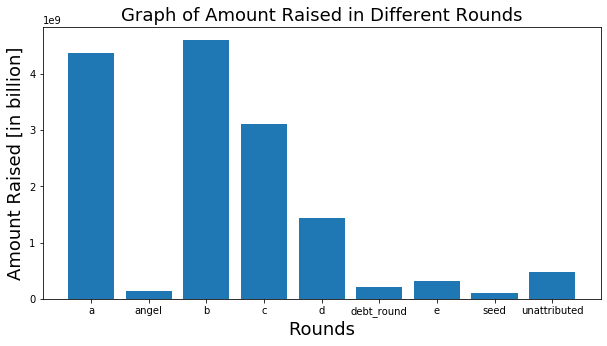

In [17]:
# PLotting a bar grapgh
# Figure() is used to define the dimensions of the whole graph
# bar() is used to plot a bar graph. 
# the two lists are passed x and y axis
# title is used to label the graph 
rounds = listofRounds
amountraised = amountRaisedLists
_=plt.figure(figsize=(10, 5))
_=plt.bar(rounds,amountraised)
_=plt.xlabel('Rounds', fontsize=18)
_=plt.ylabel('Amount Raised [in billion]', fontsize=18)
_=plt.title('Graph of Amount Raised in Different Rounds',fontsize=18)

##### Plotting Currency and Raised Amount 

The data Frame also contains Currency type and plotting the amount raised vs currency type is 
possible by using plot. This is acheived by looing thtrough the data Frame and adding all the values of raised amount by sepeating them through currency. 

In [18]:
# value_counts() gives the number of times it is present in a data frame against a particualar value
dataFrame['Raised Currency'].value_counts()

USD    1458
CAD       1
EUR       1
Name: Raised Currency, dtype: int64

In [19]:
# Copying the unique values to a list
# The list is sorted and then it is prited
listofCurrency = dataFrame['Raised Currency'].unique()
listofCurrency.sort()
print(listofCurrency)

['CAD' 'EUR' 'USD']


In [20]:
# Empty lists are declared and then they are used to append all
#the diiferent raised amounts categeroized by currency type 
usdList = []
cadList = []
eurList = []

In [21]:
# This for logic is used to loop through the data frame. 
# The above lists are appended if the if conditions are met.
for index, row in dataFrame.iterrows():
    if(row['Raised Currency'] == 'USD'):
        usdList.append(dataFrame.iloc[index]['Raised Amount'])
    if(row['Raised Currency'] == 'CAD'):
        cadList.append(dataFrame.iloc[index]['Raised Amount'])
    if(row['Raised Currency'] == 'EUR'):
        eurList.append(dataFrame.iloc[index]['Raised Amount'])

In [22]:
# This holds the sum of the raised amounts list individually
# this is later sent as y axis to plot.
listofRaisedAmountByCurrency = [sum(cadList),sum(eurList),sum(usdList)]

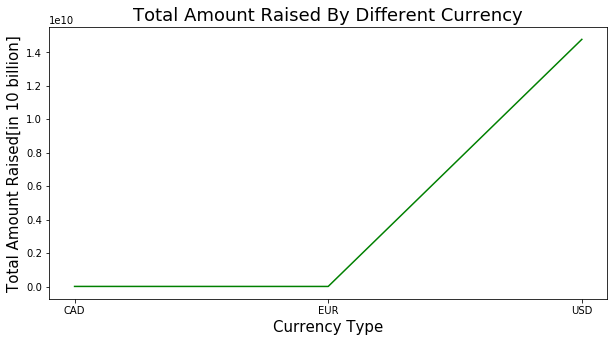

In [23]:
# Plotting the currency and Total Raised Amounts 
# xlabel and ylabel are used to label the axis
# Color is used to define the color of the plot.
currency = listofCurrency
amountraisedbyCurrency = listofRaisedAmountByCurrency
_=plt.figure(figsize=(10, 5))
_=plt.plot(currency,amountraisedbyCurrency,color='g')
_=plt.xlabel('Currency Type', fontsize=15)
_=plt.ylabel('Total Amount Raised[in 10 billion]', fontsize=15)
_=plt.title('Total Amount Raised By Different Currency',fontsize=18)

##### Plotting Range of amounts raised by Different states

The Data Frame conatins different Sates and Each state has a range on funding amount. This plot depicts the 
range and this is acheived by the scatter plot. 

In [24]:
# Copying the states and Raised amounts to the list
statesList = dataFrame['State'].tolist()
raisedAmountList = dataFrame['Raised Amount'].tolist()

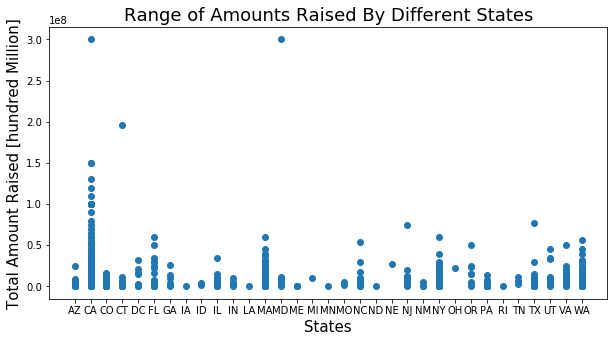

In [25]:
# plotting a scatter plot 
_=plt.figure(figsize=(10, 5))
_=plt.scatter(statesList,raisedAmountList)
_=plt.xlabel('States', fontsize=15)
_=plt.ylabel('Total Amount Raised [hundred Million]', fontsize=15)
_=plt.title('Range of Amounts Raised By Different States',fontsize=18)

##### Plotting Company Categories and Percentage of Employees

Plotting also enables to display the percentage consumed. This can be acheived by using pie charts. 
Here, Iused pie charts to show the percentage of employees against compnay categories. 

Source : https://pythonspot.com/matplotlib-pie-chart/

In [26]:
# Copying all the dictict categories to a list
listofCategories = dataFrame['Category'].unique()

In [27]:
# Sorting and printing a list
listofCategories.sort()
print(listofCategories)

['biotech' 'cleantech' 'consulting' 'hardware' 'mobile' 'other' 'software'
 'web']


In [28]:
# Declaring the empty list and these are used to append the employee counts 
# TotalEmployeeList stores the sum of all the employees of categories.
bioList = []
cleanList = []
consultingList = []
hardwareList=[]
mobileList=[]
otherList = []
softwareList=[]
webList=[]
TotalEmployeeList = []

In [29]:
# This for logic is used to append all the employees of categores into a list. 
# Later, these lists are summed and appended to another list which is passed to pie chart. 
for index , row in dataFrame.iterrows():
    if(row["Category"] == 'biotech'):
        bioList.append(dataFrame.iloc[index]['Employee Count'])
    if(row["Category"] == 'cleantech'):
        cleanList.append(dataFrame.iloc[index]['Employee Count'])
    if(row["Category"] == 'consulting'):
        consultingList.append(dataFrame.iloc[index]['Employee Count'])
    if(row["Category"] == 'hardware'):
        hardwareList.append(dataFrame.iloc[index]['Employee Count'])
    if(row["Category"] == 'mobile'):
        mobileList.append(dataFrame.iloc[index]['Employee Count'])
    if(row["Category"] == 'other'):
        otherList.append(dataFrame.iloc[index]['Employee Count'])
    if(row["Category"] == 'software'):
        softwareList.append(dataFrame.iloc[index]['Employee Count'])
    if(row["Category"] == 'web'):
        webList.append(dataFrame.iloc[index]['Employee Count'])

In [30]:
# this list stores the summation of the employees 
TotalEmployeeList = [sum(bioList),sum(cleanList),sum(consultingList),sum(hardwareList),sum(mobileList)
                    ,sum(otherList),sum(softwareList),sum(webList)]

In [31]:
# printing the list
print(TotalEmployeeList)

[5, 18, 608, 1684, 197, 5524, 2123, 44115]


In [32]:
# Calulating the percentages of the employees based on the total count.
sizeofPie = []
for value in TotalEmployeeList:
    sizeofPie.append(100 * value / sum(TotalEmployeeList))

In Order to pack the list of categories and their percentages of employees, Zip() is used which will be passed to dictionary later. Source : https://thispointer.com/python-how-to-convert-a-list-to-dictionary/

In [33]:
zipFile = zip(listofCategories, sizeofPie)

categoriesAndEmployees is a dict which will hold keys as 
categories and Values as the percetnage of number of employees

In [34]:
# Declarin the dictionary and adding the zip file it it. 
categoriesAndEmployees = dict(zipFile)

In [35]:
# Displaying the Dictionary 
# The values are percetnages of the pie chart 
# The keys are labels of the pie chart. 
categoriesAndEmployees

{'biotech': 0.009212514279397134,
 'cleantech': 0.033165051405829676,
 'consulting': 1.1202417363746915,
 'hardware': 3.1027748093009544,
 'mobile': 0.362973062608247,
 'other': 10.177985775877952,
 'software': 3.911633563032023,
 'web': 81.2820134871209}

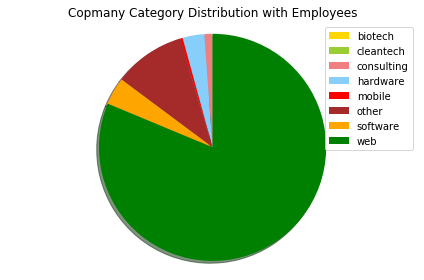

In [36]:
# This logic is used to plot a Pie Chart. 
# Sizes of pie chart is automatically converted into percentages. 
# The Categories should be passed as the labels to the pie chart. 
labels = listofCategories
sizes = TotalEmployeeList
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red','brown','orange','green']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.title('Copmany Category Distribution with Employees')
plt.tight_layout()
plt.show()

## Learning Objectives : 
1. Learnt how to clean and replace the Nan values by using fillna() method. 
2. Learnt how to convert the data types. 
3. Learnt how to loop through the data Frame and accessing the index value. 
4. Learnt how to convert the dataFrame to lists 
5. Learnt how to pass the lists to plots as x and y axis. 
6. Learnt how to plot pie charts. 
7. Learnt how to pass two list as key value pairs to a dict.

## Text of The proposal 

Project Proposal : Company Fundings Records - A data File by TechCrunch Company

Data Source Location: 
1. Browse this link : https://support.spatialkey.com/spatialkey-sample-csv-data/
2. After browsing the above page, Navigate to "Company Funding Records" section and click on "download.csv file link" 



Describe how data source was discovered ?
I am using the data source links provided to us during the week 2 assignment in DATA - 602 lecture. Also searching for fake datasets on google provides about spatialkey website. 
This website provides sample data sets to work up on. I used a sample data provided by TechCrunch under Company Funding Records Section. 

Data is open source. Legally anyone can download it.
There is no other documentation provided regarding this data. 

Size of Data : 
Columns : 10
Rows : 1460
Size : 93,536 bytes (94 KB)


Project proposal relevant to Data 601 objectives:
The proposed data consists of data relates to multiple companies and their funding records in different states/cities with their raised amount. 
Using this data, I can apply all the objectives of DATA-601 like, reading the CSV file, Cleaning the data, Looping over the file, Visualizing the overall data etc..
I can perform the following operation which includes all the above mentioned Objectives :  
 1. I can read the csv and load them to data frames. 
 2. I can plot the records of Company Vs State with the funding amount raised.  
 3. I can plot the amount raised in different rounds bu summing up all the amounts based on the same rounds. This can be achieved by looping through the data Set. 


Does student understand the stories in the data?
This data file provides the data of different companies and their raised amount on particular categories in different Staes and cities. 
My work experience back in India includes, developing requirements for an Insurance Company which has subsidiaries under it. I worked on developing a tool 
to formulate the incomes, fundings, revenues of the subsidiaries and this is the reason why I selected this data set. 